<h1 align='center'>EE5907_CA2  &nbsp; &nbsp;&nbsp;&nbsp;     Yang Di &nbsp; &nbsp;&nbsp;&nbsp;    A0229522H<h1>
<h2>Part 3: SVM for Classification<h2>

<p>In this part, I will sse the raw face images (vectorized) and the face vectors after PCA pre-processing (with dimensionality of 80 and 200) as inputs to linear SVM. Try values of the penalty parameter C in {0.01, 0.1, 1}.<p>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
path = os.path.abspath('MINE')  # to get the path of my own photo without process.

import random

def random_select(num, start, end, seed): # to randomly select 25 picture sets from PIE and randomly select pictures as training set
    random.seed(seed)
    selected_id = [i for i in range(start,end)]
    random.shuffle(selected_id)
    return sorted(selected_id[0:num])

# choose 25 PIE subjects 
selected_id = random_select(num=25, start=1, end=68,seed=90) 
print("Selected subset's id are", selected_id)

Selected subset's id are [1, 6, 11, 13, 14, 15, 16, 19, 21, 22, 26, 28, 31, 33, 36, 39, 42, 45, 46, 55, 56, 58, 59, 60, 61]


The number of chosen images: 4250
Image size: (32, 32)
Training set: 2975 (0.7) Test set: 1275 (0.3)

 randomly display ten photos from dataset


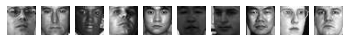

In [11]:
# to randonmly choose 25 PIE subjects 
train_img = []
train_label = []
test_img = []
test_label = []

for file in selected_id:
    # Please replace the address of PIE here with you PIE folder's complete address
    wd = os.path.join("PIE/",str(file))    # load work address of each subset
    chosen_img = []           
    corre_label = []
    
    for img_id in os.listdir(wd):
        path = os.path.join(wd, img_id)
        img = plt.imread(path)
        chosen_img.append(img)
        corre_label.append(int(file))

# For each chosen subject,70% of the contained images are for training and the remaining 30% is for testing.        
    train_idx = random_select(num=round(len(chosen_img)*0.7),start=0, end=len(chosen_img), seed=20)
    
    for i in range(0,len(chosen_img)):
            if i in train_idx:
                train_img.append(chosen_img[i])
                train_label.append(corre_label[i])
            else:
                test_img.append(chosen_img[i])            
                test_label.append(corre_label[i])

        # right here,i choose to use probably approach to separate images, 
        #the training number and test number can be exactly equal to 2975(0.7) and 1275(0.3).
        

print("The number of chosen images:",len(train_label)+len(test_label))        
print("Image size: {}\nTraining set: {} ({}) Test set: {} ({})".format(train_img[0].shape, len(train_label),len(train_label)/(len(train_label)+len(test_label)), len(test_label),len(test_label)/(len(train_label)+len(test_label))))
fig, axs= plt.subplots(1, 10) 

for i in range(10):          
    img = random.choice(train_img)         
    axs[i].imshow(img, cmap='gray')              
    axs[i].axis('off')  

print('\n randomly display ten photos from dataset')  
plt.show()

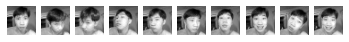

In [12]:
#To load my photo set
my_img= []
my_label = []
for i in os.listdir("MINE/OP/"):
    img = plt.imread("MINE/OP/"+i)
    my_img.append(img)
    my_label.append(99)# 99 stands for the label for my own photo data
    
# right here i just mannually seperate my photos into 2 part, due to the number of photos is small.       
my_train_img = my_img[0:7]
my_test_img = my_img[7:10]
my_train_label = my_label[0:7]
my_test_label = my_label[7:10]

fig, axs = plt.subplots(1, 10)

for i in range(10):
    img = my_img[i]
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    
plt.show()

In [13]:
train_img.extend(my_train_img)
train_label.extend(my_train_label)
test_img.extend(my_test_img)
test_label.extend(my_test_label)
print("Now, Training set: {}  Testing set: {}".format(len(train_label), len(test_label)))

train_x = np.array(train_img)
train_y = np.array(train_label)
test_x = np.array(test_img)
test_y = np.array(test_label)
train_x = train_x.reshape(len(train_img), -1)
test_x = test_x.reshape(len(test_img), -1)
print("Training set {}    Testing set{}".format(train_x.shape, test_x.shape))


Now, Training set: 2982  Testing set: 1278
Training set (2982, 1024)    Testing set(1278, 1024)


In [14]:
test_y

array([ 1,  1,  1, ..., 99, 99, 99])

In [15]:
print('to process data with PCA')
print('\n')
pca80 = PCA(n_components=80)
pca80.fit(train_x)
train_80 = pca80.transform(train_x)
test_80 = pca80.transform(test_x)

pca200 = PCA(n_components=200)
pca200.fit(train_x)
train_200 = pca200.transform(train_x)
test_200 = pca200.transform(test_x)

print('Start to train SVM ...')
print('\n')

to process data with PCA


Start to train SVM ...




In [26]:
c = [0.01,0.1,1]

for i in c:
    print('When the penalty parameter C =',i) 
    SVM = svm.LinearSVC(C=i)
    SVM.fit(train_80, train_y)
    train_pred = SVM.predict(train_80)
    test_pred = SVM.predict(test_80)
    print('Accuracy for 80 components of PCA on train set is {} %'.format(round(accuracy_score(train_y, train_pred)*100,4))) 
    print('Accuracy for 80 components of PCA on test set is {} %'.format(round(accuracy_score(test_y, test_pred)*100,4))) 
    print('-'*60)
    SVM = svm.LinearSVC(C=i)
    SVM.fit(train_200, train_y)
    train_pred = SVM.predict(train_200)
    test_pred = SVM.predict(test_200)
    print('Accuracy for 200 components of PCA on train set is {} %'.format(round(accuracy_score(train_y, train_pred)*100,4))) 
    print('Accuracy for 200 components of PCA on test set is {} %'.format(round(accuracy_score(test_y, test_pred)*100,4))) 
    print('-'*60)
    SVM = svm.LinearSVC(C=i)
    SVM.fit(train_x, train_y)
    train_pred = SVM.predict(train_x)
    test_pred = SVM.predict(test_x)
    print('Accuracy for None PCA on train set is {} %'.format(round(accuracy_score(train_y, train_pred)*100,4))) 
    print('Accuracy for None PCA on test set is {} %'.format(round(accuracy_score(test_y, test_pred)*100,4))) 
    print('\n')          



When the penalty parameter C = 0.01
Accuracy for 80 components of PCA on train set is 67.0691 %
Accuracy for 80 components of PCA on test set is 68.5446 %
------------------------------------------------------------
Accuracy for 200 components of PCA on train set is 80.6841 %
Accuracy for 200 components of PCA on test set is 82.0814 %
------------------------------------------------------------
Accuracy for None PCA on train set is 100.0 %
Accuracy for None PCA on test set is 98.2786 %


When the penalty parameter C = 0.1
Accuracy for 80 components of PCA on train set is 59.4232 %
Accuracy for 80 components of PCA on test set is 60.7199 %
------------------------------------------------------------
Accuracy for 200 components of PCA on train set is 82.0255 %
Accuracy for 200 components of PCA on test set is 83.8028 %
------------------------------------------------------------
Accuracy for None PCA on train set is 100.0 %
Accuracy for None PCA on test set is 98.2786 %


When the penalt

As shown above, for penalty parameter C=0.01,C=0.1 and C=1, with the C fixed, the accuracy on training set and test set will increase along with considering more feature component in training data.<br>
For dataset processed by  PCA with 80 components, when C=0.01, the accuracy is best(around 68 %).<br>
For dataset processed by  PCA with 200 components, when C=1, the accuracy is best, which is up to be around 87.5 % on test set and 84.9 % on training set.<br>
For Original dataset, the accuracy is the best compared with other SVM model trained with PCA processed data, which is up to around 98.3 % on test set.<br>